In [2]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

### Import and analyse labelled data

In [3]:
data = pd.concat([pd.read_csv(f"labeled_data/{i}.csv") for i in range(1, 4)], ignore_index=True)

In [4]:
data.head(10)

,Surface,SensorLocation,PacketCounter,SampleTimeFine,Acc_X,Acc_Y,Acc_Z,FreeAcc_X,FreeAcc_Y,FreeAcc_Z,...,OriInc_q3,Roll,Pitch,Yaw,Latitude,Longitude,Altitude,Vel_X,Vel_Y,Vel_Z
0,FE,Left shank,63872,NaN,9.855517,1.419511,1.056100,0.000000,-0.000000,0.200383,...,-0.000050,53.299628,-79.819856,-120.515449,NaN,NaN,0.0,NaN,NaN,NaN
1,FE,Left shank,63873,NaN,9.618346,1.531807,0.793353,0.385820,-0.297160,-0.053012,...,-0.000047,46.646334,-79.631895,-115.706065,NaN,NaN,0.0,NaN,NaN,NaN
2,FE,Left shank,63874,NaN,9.340269,1.537687,0.719518,0.436632,-0.315490,-0.334679,...,-0.000096,46.794904,-79.634026,-115.808157,NaN,NaN,0.0,NaN,NaN,NaN
3,FE,Left shank,63875,NaN,9.262140,1.534052,0.871657,0.379882,-0.161510,-0.393031,...,-0.000139,46.968656,-79.627834,-115.908051,NaN,NaN,0.0,NaN,NaN,NaN
4,FE,Left shank,63876,NaN,9.087550,2.048158,0.982283,0.825285,0.149745,-0.483171,...,-0.000186,47.134912,-79.615354,-116.007378,NaN,NaN,0.0,NaN,NaN,NaN
5,FE,Left shank,63877,NaN,9.269620,2.143047,1.186317,0.819039,0.341750,-0.266052,...,-0.000250,47.267581,-79.596703,-116.142559,NaN,NaN,0.0,NaN,NaN,NaN
6,FE,Left shank,63878,NaN,9.614805,2.073638,1.289046,0.685314,0.352942,0.077300,...,-0.000341,47.318277,-79.558501,-116.232454,NaN,NaN,0.0,NaN,NaN,NaN
7,FE,Left shank,63879,NaN,9.792674,1.988375,1.036191,0.679623,0.053379,0.210238,...,-0.000376,47.321949,-79.505172,-116.305558,NaN,NaN,0.0,NaN,NaN,NaN
8,FE,Left shank,63880,NaN,9.987451,1.946248,1.018288,0.628563,-0.019499,0.394099,...,-0.000367,47.246917,-79.449607,-116.315727,NaN,NaN,0.0,NaN,NaN,NaN
9,FE,Left shank,63881,NaN,9.748557,2.029506,1.153794,0.673247,0.162252,0.187558,...,-0.000323,47.170023,-79.391111,-116.343581,NaN,NaN,0.0,NaN,NaN,NaN


In [5]:
data.columns

Index(['Surface', 'SensorLocation', 'PacketCounter', 'SampleTimeFine', 'Acc_X',
       'Acc_Y', 'Acc_Z', 'FreeAcc_X', 'FreeAcc_Y', 'FreeAcc_Z', 'Gyr_X',
       'Gyr_Y', 'Gyr_Z', 'Mag_X', 'Mag_Y', 'Mag_Z', 'VelInc_X', 'VelInc_Y',
       'VelInc_Z', 'OriInc_q0', 'OriInc_q1', 'OriInc_q2', 'OriInc_q3', 'Roll',
       'Pitch', 'Yaw', 'Latitude', 'Longitude', 'Altitude', 'Vel_X', 'Vel_Y',
       'Vel_Z'],
      dtype='object')

In [6]:
data.drop(["PacketCounter", "SampleTimeFine", "Latitude", "Longitude", "Vel_X", "Vel_Y", "Vel_Z"], axis=1, inplace=True)

In [7]:
data.dropna(axis=0, how="any", inplace=True)

In [8]:
data["Surface"], _ = data["Surface"].factorize()
data["SensorLocation"], _ = data["SensorLocation"].factorize()

In [9]:
data.sample(10)

,Surface,SensorLocation,Acc_X,Acc_Y,Acc_Z,FreeAcc_X,FreeAcc_Y,FreeAcc_Z,Gyr_X,Gyr_Y,...,VelInc_Y,VelInc_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Roll,Pitch,Yaw,Altitude
1035521,9,4,12.353075,-1.847708,3.122179,-0.397349,5.053655,2.021916,-1.693887,-0.893141,...,-0.019465,0.031935,0.999902,-0.008469,-0.004466,-0.010191,-46.589415,-52.034618,82.929276,0.0
18271,1,0,15.599057,0.568188,-6.130276,-3.224076,5.845054,5.567549,-0.840491,7.135524,...,0.004723,-0.066836,0.999345,-0.004202,0.035670,-0.004436,81.348370,-77.390188,61.802163,0.0
1352385,9,3,9.743392,-1.281470,-0.380726,0.224611,-1.297218,-0.066548,-0.275341,-0.611476,...,-0.012747,-0.003492,0.999994,-0.001377,-0.003057,0.000745,-146.608597,-77.929156,-120.283148,0.0
920127,8,5,14.547356,4.481365,0.101991,-4.176965,4.332661,4.169040,1.508342,-1.963385,...,0.045178,0.002787,0.999920,0.007542,-0.009817,0.002623,-13.769782,-77.673231,88.384656,0.0
1172031,7,0,9.893254,-0.020338,5.378688,-11.227883,0.648460,-9.245920,-0.402902,0.260568,...,-0.000195,0.053658,0.999997,-0.002015,0.001303,-0.001008,-161.804476,-30.276123,167.981426,0.0
1128553,7,2,9.064757,-0.664653,-2.289013,0.401485,0.885472,-0.490379,-0.600544,-0.755700,...,-0.006695,-0.022527,0.999988,-0.003003,-0.003778,0.000216,-156.718373,-69.537702,84.393904,0.0
266436,2,4,-9.217713,2.829627,2.080668,0.436426,-0.114599,0.041175,0.132248,0.015153,...,0.028302,0.020832,1.000000,0.000661,0.000076,-0.000210,60.280628,68.090730,102.230682,0.0
1499182,7,2,0.917793,1.360193,-1.973144,-2.186618,1.340791,-9.894529,0.759694,-0.541469,...,0.013679,-0.019655,0.999989,0.003798,-0.002707,0.000271,2.898290,-62.239350,114.032017,0.0
122572,6,5,15.277555,-3.120332,4.695131,1.145912,-5.548894,5.451853,1.654883,5.592101,...,-0.031161,0.042397,0.999571,0.008273,0.027957,0.002640,-56.143675,-88.533162,128.244681,0.0
261375,5,1,13.632232,1.379870,-1.559682,0.573565,-3.603537,3.486167,-0.978855,0.415635,...,0.013794,-0.015948,0.999986,-0.004894,0.002078,0.000531,176.872048,-68.931856,-60.166353,0.0


In [10]:
data.dtypes

Surface             int64
SensorLocation      int64
Acc_X             float64
Acc_Y             float64
Acc_Z             float64
FreeAcc_X         float64
FreeAcc_Y         float64
FreeAcc_Z         float64
Gyr_X             float64
Gyr_Y             float64
Gyr_Z             float64
Mag_X             float64
Mag_Y             float64
Mag_Z             float64
VelInc_X          float64
VelInc_Y          float64
VelInc_Z          float64
OriInc_q0         float64
OriInc_q1         float64
OriInc_q2         float64
OriInc_q3         float64
Roll              float64
Pitch             float64
Yaw               float64
Altitude          float64
dtype: object

In [11]:
target = data.pop("Surface")
discrete_features = data.dtypes != np.float64

In [12]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(data, target, discrete_features)
mi_scores

Mag_Y             3.091062e-01
Mag_X             2.377840e-01
Yaw               9.135726e-02
Mag_Z             8.221141e-02
Acc_X             6.196160e-02
VelInc_X          6.171139e-02
Pitch             5.893462e-02
FreeAcc_X         5.775990e-02
FreeAcc_Z         5.664970e-02
OriInc_q0         5.264139e-02
FreeAcc_Y         5.222272e-02
Roll              4.385201e-02
OriInc_q2         4.175174e-02
OriInc_q1         4.045247e-02
Gyr_Y             4.029700e-02
Gyr_X             3.923551e-02
Gyr_Z             3.868945e-02
OriInc_q3         3.831598e-02
Acc_Z             2.811212e-02
VelInc_Z          2.741996e-02
Acc_Y             1.790258e-02
VelInc_Y          1.781290e-02
Altitude          5.181755e-05
SensorLocation    6.260616e-07
Name: MI Scores, dtype: float64

#### Plot Acc_X raw and filtered with 2-nd order Butterworth

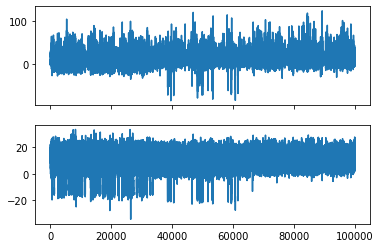

In [22]:
t = np.linspace(0, 100000, len(data))
y = data.Acc_X
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
# Raw data
ax1.plot(t, y)
# Filtered
sos = signal.butter(2, 6, btype="lp", fs=100, output="sos")
ax2.plot(t, signal.sosfilt(sos, y))

##### Range of signal is lower in the filtered graph (below)